In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from datetime import datetime

In [2]:
data_EA = pd.read_csv('HB.csv')

In [3]:
def sort_days(row):
    # Assuming day columns start from the third column
    day_columns = data_EA.columns[2:]
    
    # Sort the day columns, ignoring NaNs
    sorted_days = sorted(row[day_columns].dropna())
    
    # Extend the sorted days with NaNs to match the original number of day columns
    sorted_days.extend([np.nan] * (len(day_columns) - len(sorted_days)))
    
    # Return a new series with year, month, and sorted days
    return pd.Series([row['year'], row['month']] + sorted_days, index=data_EA.columns)

# Apply the function to each row
sorted_data = data_EA.apply(sort_days, axis=1)

In [4]:
# Function to generate all weeks in a range of years
def generate_weeks(start_year, end_year):
    weeks = []
    for year, week in product(range(start_year, end_year + 1), range(1, 53)):  # 53 weeks to cover edge cases
        weeks.append({"year": year, "week": week})
    return pd.DataFrame(weeks)

# Generate a DataFrame of all weeks between 1990 and 2020
all_weeks_df = generate_weeks(1990, 2020)

In [5]:
def expand_data_custom_week(df):
    expanded_data = []

    for _, row in df.iterrows():
        year = int(row['year'])
        month = int(row['month'])
        days = row[2:]

        for day in days:
            if pd.notna(day):
                try:
                    day_int = int(day)
                    date = datetime(year, month, day_int)
                    year_start = datetime(year, 1, 1)

                    # Calculate the week number by finding the difference in days and dividing by 7
                    delta_days = (date - year_start).days
                    week = delta_days // 7 + 1  # Adding 1 because week starts from 1

                    expanded_data.append({"year": year, "week": week, "day": day})
                except ValueError:
                    continue

    return pd.DataFrame(expanded_data)

expanded_data_custom_week = expand_data_custom_week(sorted_data)

# Merge to ensure all weeks are represented, with NaN for missing data
#final_df_revised = pd.merge(all_weeks_df, expanded_data_custom_week, on=["year", "week"], how="left").drop_duplicates()

In [6]:
pivoted_df = expanded_data_custom_week.pivot(index='year', columns='week', values='day')

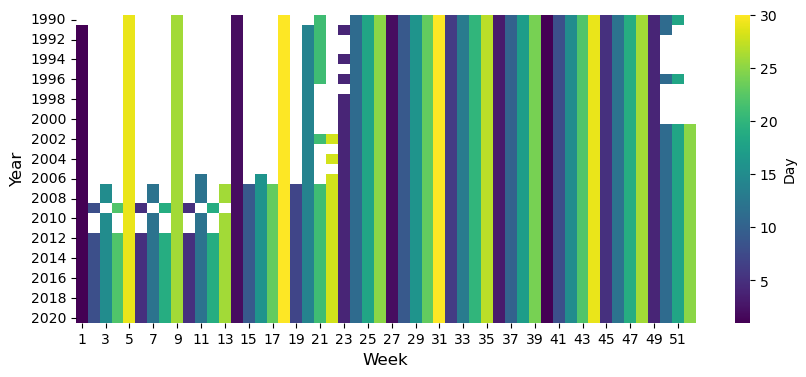

In [7]:
plt.figure(figsize=(10, 4))
sns.heatmap(pivoted_df, cmap='viridis', cbar_kws={'label':'Day'})
plt.xlabel('Week', fontsize=12)
plt.ylabel('Year', fontsize=12)
#plt.savefig('EA_availability.jpg',dpi=500, bbox_inches='tight')
plt.show()

### Altogether

In [8]:
def data_availabilty(data):
    data_df = pd.read_csv(data)
    # --------------------------------------------------------------------------------------------
    # sorted function 
    def sort_days(row):
        # Assuming day columns start from the third column
        day_columns = data_df.columns[2:]

        # Sort the day columns, ignoring NaNs
        sorted_days = sorted(row[day_columns].dropna())

        # Extend the sorted days with NaNs to match the original number of day columns
        sorted_days.extend([np.nan] * (len(day_columns) - len(sorted_days)))

        # Return a new series with year, month, and sorted days
        return pd.Series([row['year'], row['month']] + sorted_days, index=data_df.columns)

    # Apply the function to each row
    sorted_data = data_df.apply(sort_days, axis=1)
    # --------------------------------------------------------------------------------------------
    # custom week function
    def expand_data_custom_week(df):
        expanded_data = []

        for _, row in df.iterrows():
            year = int(row['year'])
            month = int(row['month'])
            days = row[2:]

            for day in days:
                if pd.notna(day):
                    try:
                        day_int = int(day)
                        date = datetime(year, month, day_int)
                        year_start = datetime(year, 1, 1)

                        # Calculate the week number by finding the difference in days and dividing by 7
                        delta_days = (date - year_start).days
                        week = delta_days // 7 + 1  # Adding 1 because week starts from 1

                        expanded_data.append({"year": year, "week": week, "day": day})
                    except ValueError:
                        continue
        return pd.DataFrame(expanded_data)
    
    #usage with your sorted data
    data_custom_week = expand_data_custom_week(sorted_data)
    # --------------------------------------------------------------------------------------------
    pivoted_df = data_custom_week.pivot(index='year', columns='week', values='day')
    
    return pivoted_df

In [9]:
EA_data=data_availabilty('EA.csv')
EC_data=data_availabilty('EC.csv')
HB_data=data_availabilty('HB.csv')

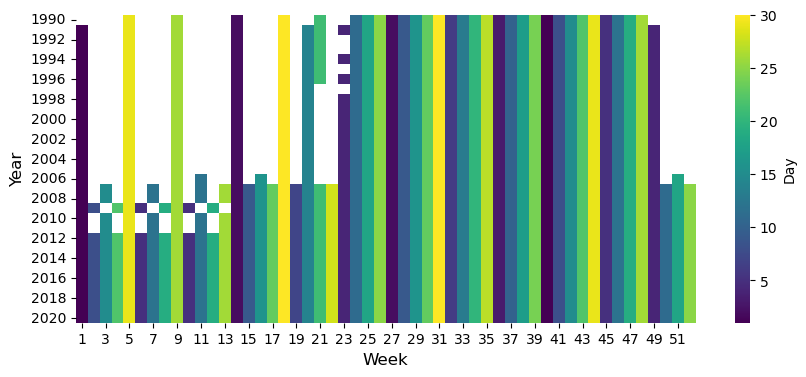

In [13]:
plt.figure(figsize=(10, 4))
sns.heatmap(EA_data, cmap='viridis', cbar_kws={'label':'Day'})
plt.xlabel('Week', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.savefig('EA_availability.jpg',dpi=500, bbox_inches='tight')
plt.show()

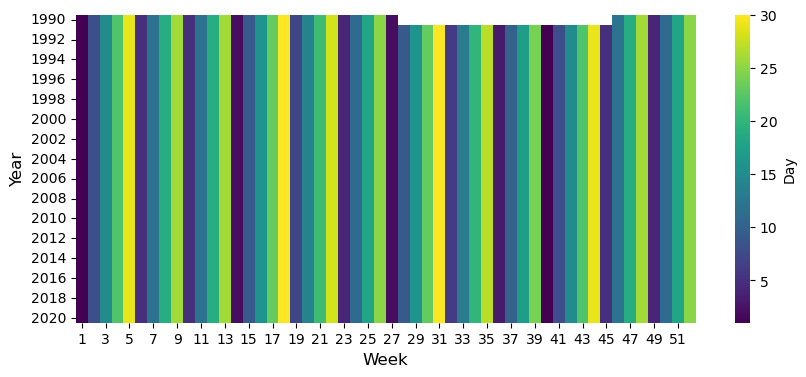

In [14]:
plt.figure(figsize=(10, 4))
sns.heatmap(EC_data, cmap='viridis', cbar_kws={'label':'Day'})
plt.xlabel('Week', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.savefig('EC_availability.jpg',dpi=500, bbox_inches='tight')
plt.show()

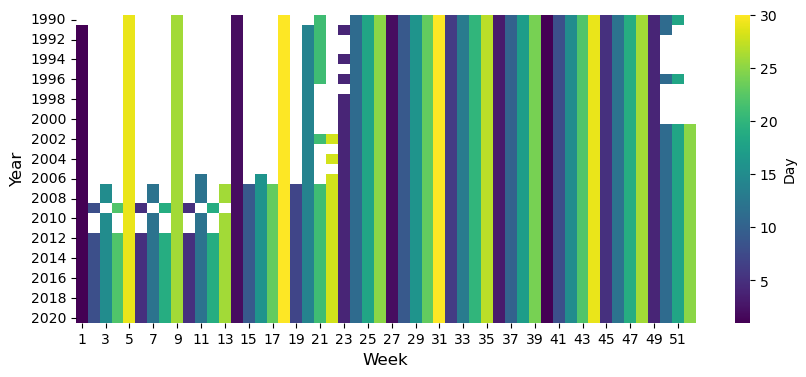

In [15]:
plt.figure(figsize=(10, 4))
sns.heatmap(HB_data, cmap='viridis', cbar_kws={'label':'Day'})
plt.xlabel('Week', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.savefig('HB_availability.jpg',dpi=500, bbox_inches='tight')
plt.show()